<a href="https://colab.research.google.com/github/ManaliKT/Machine_Learning_stock_price_prediction_project/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

# **YES BANK STOCK CLOSING PRICE PREDICTION**


**Yes Bank Limited is an Indian private sector bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004.
It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it.**

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.**

# **Problem Statement** ==> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news  because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
#Importing all the libarary

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [ ]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Below are the libraries that are used in predicting the stocks:**

*   Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated

In [ ]:
df_yesbank =  pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")

## **DATA EXPLORATION**

In [ ]:
#Shape of our dataset
df_yesbank.shape

(185, 5)



## **Knowing the dataset**
Dataset contains Yes Bank stock monthly prices since it listed on stock exchange.

Following are its features:-

* **Date**: In our data its monthly observation of stock since it listed.
* **Open**: The price a stock when the stock exchange open for the day.
* **High**: The maximum price of a stock attain during given period of time.
* **Low**: The minimum price of a stock attain during given period of time.
* **Close**: The price of a stock when the stock exchange closed for the day.






**"Close" is the dependent variable or the target variable in this case & rest all are independent variables or input variables.**

In [ ]:
#checking first five values of our dataset
df_yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Checking last five values  of our dataset
df_yesbank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#Getting the concise summary of data
df_yesbank.info()
# Dataset has no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


From above we can conclude that:


1.   The shape of our dataset is 185 rows and 5 columns
2.   Datatype of Date is given as object which we need to change that to DateTime
3.  Yes bank stock listed on month of july 2005.We have data available from july 2005 to november 2020



### **Gettting Statistical Information about our dataset**

In [ ]:
# Getting some statistical information
df_yesbank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


From above statistical information we can see that it is not a normal distribution as mean and 50% values are having alot of difference

## **DATA CLEANING**

In data cleaning we will check for:


1.   Null values/NaN values
2.   Duplicates
3.   Outlier Detection

In [ ]:
#Check for duplicate values
len(df_yesbank[df_yesbank.duplicated()])

0

In [ ]:
#Check the columns present in dataset
df_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
#Check for null values in dataset
df_yesbank.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


# **Outlier Detection**

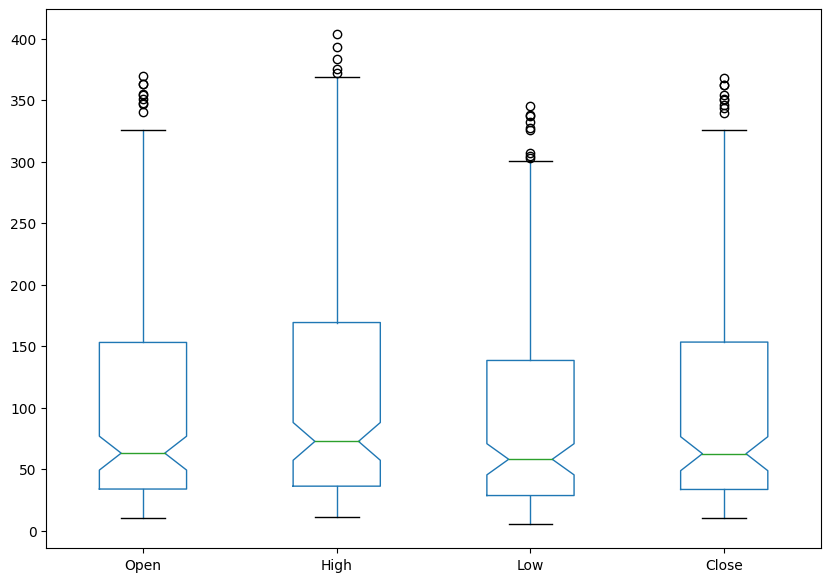

In [ ]:
fig = plt.figure(figsize =(10, 7))
boxplot = df_yesbank.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)

plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen  quick within very few months thats why top value of stocks looks like outliers.


Conclusion:
1.   There are no duplicates present
2.   There are no null values present
3.   Columns in dataset are Date,Open,High,Low,Close



## **Data Type Correction**

In [ ]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df_yesbank['Date'] = df_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#Check the datatype of the columns after changing datatype of date
df_yesbank.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64


-----YES!!! datatype change into reqiured format

In [ ]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df_yesbank.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


## **Exploratory Data Analysis**

!!! now its time to visualise things.

firstly will see how closing price change with given time

In [ ]:
def update_font():
  font_family="Courier New",
  title_font_family="Times New Roman",
  legend_title_font_color="green"

## **Plotting bar graph of Closing Price wrt Year**

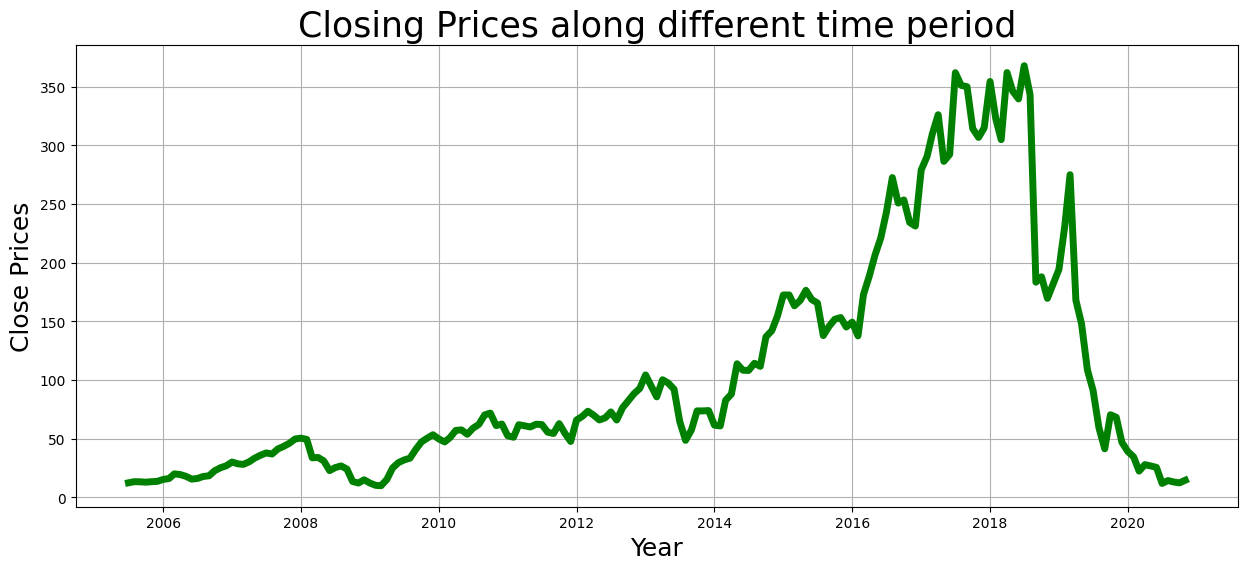

In [ ]:
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(15,6))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(df_yesbank['Date'], df_yesbank['Close'],linewidth=5,color='green')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()

# 2018 onwards the closing stock prices have witnessed a downfall and the reason can be the fraud case.

## **Plotting line graph of Date and other parameters**

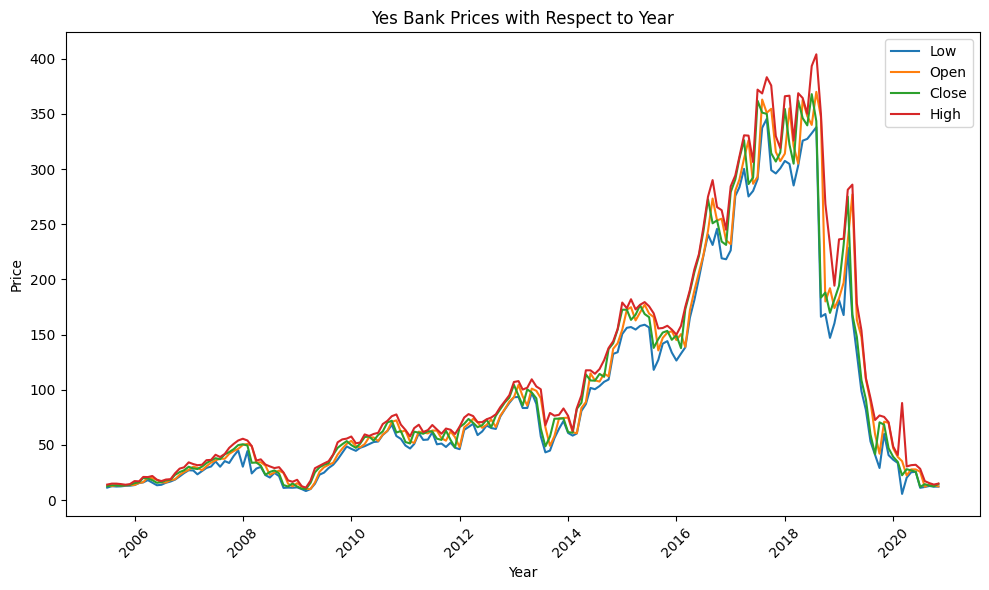

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_yesbank['Date'], df_yesbank['Low'], label='Low')
plt.plot(df_yesbank['Date'], df_yesbank['Open'], label='Open')
plt.plot(df_yesbank['Date'], df_yesbank['Close'], label='Close')
plt.plot(df_yesbank['Date'], df_yesbank['High'], label='High')

# Add title and labels
plt.title("Yes Bank Prices with Respect to Year")
plt.xlabel("Year")
plt.ylabel("Price")

# Add legend
plt.legend()

# Rotate the x-axis labels if needed (for readability)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust the layout to fit all elements nicely
plt.show()



*   Here we cans see that the stocks were high from 2017 to 2018 but it dropped after 2018 because of fraud case regarding to Rana kapoor.
*  We can see in 2017 to 2019 there can be high action seen because of difference in high and low lines.
*   We can take closing price of the stock as the dependent variable as it is the final price of that day.



# **Distribution of dependent variable  Close Price of stock.**

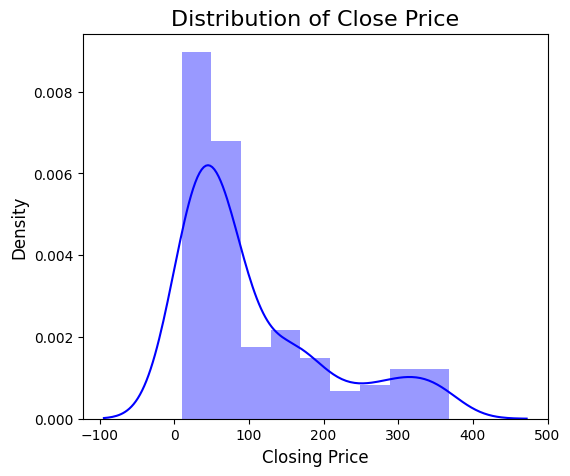

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(df_yesbank['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is rightly skewed distribution.

need to go with log transformation to make it normal distribution

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

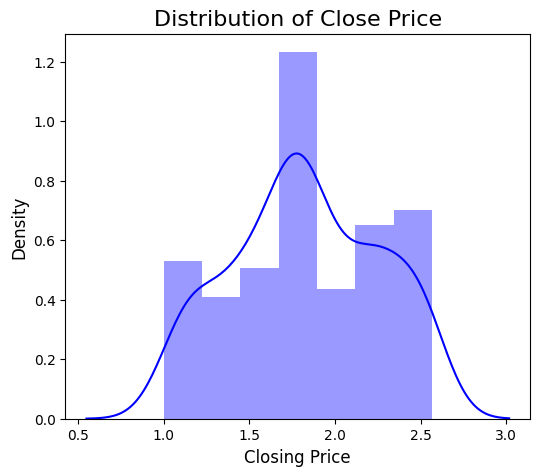

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df_yesbank['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

I have used log10 transformation as it was positively skewed.Now it seems more normal

# **Distribution of numerical features High, Low and Open price of stock.**

In [ ]:
# List of independent features
numerical_features = list(df_yesbank.drop(['Close','Date'],axis=1))
numerical_features

['Open', 'High', 'Low']

<function matplotlib.pyplot.show(close=None, block=None)>

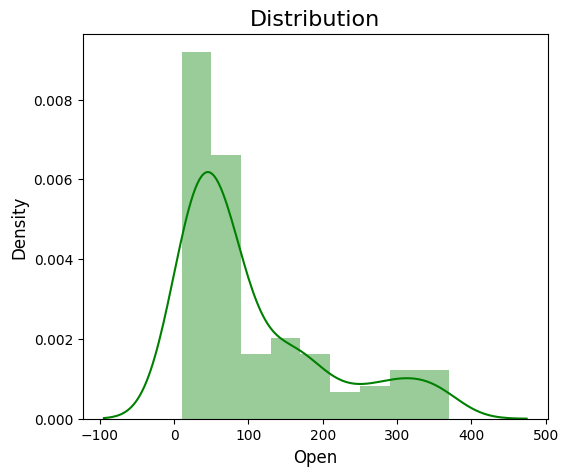

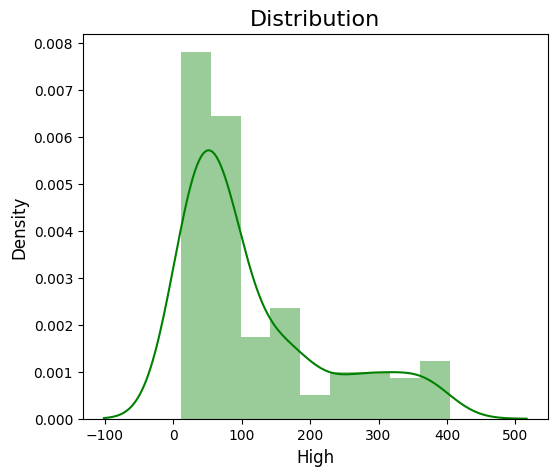

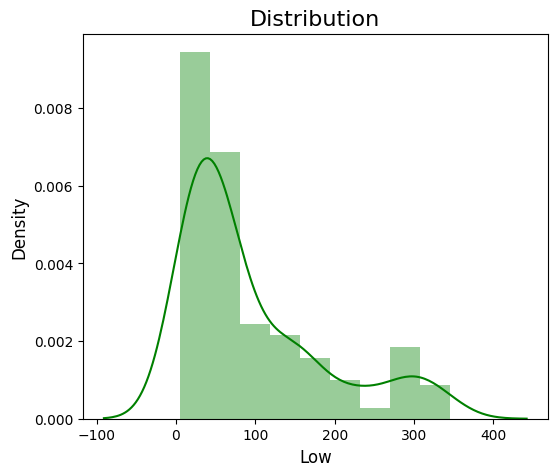

In [ ]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df_yesbank[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

* It looks all numerical features are rightly skewed.
* We need to Apply log transformation to make normal.

<function matplotlib.pyplot.show(close=None, block=None)>

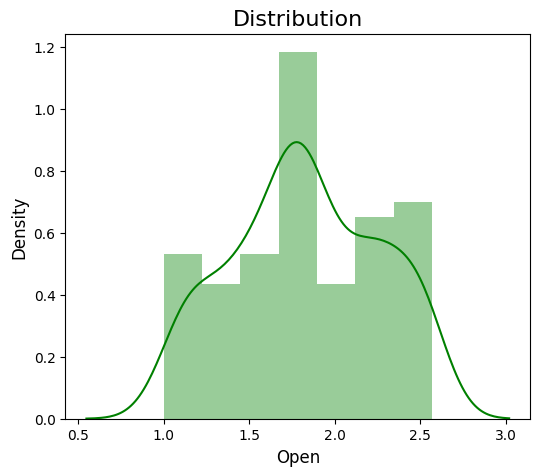

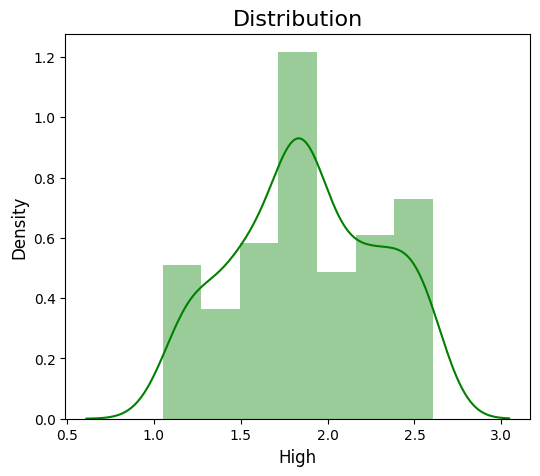

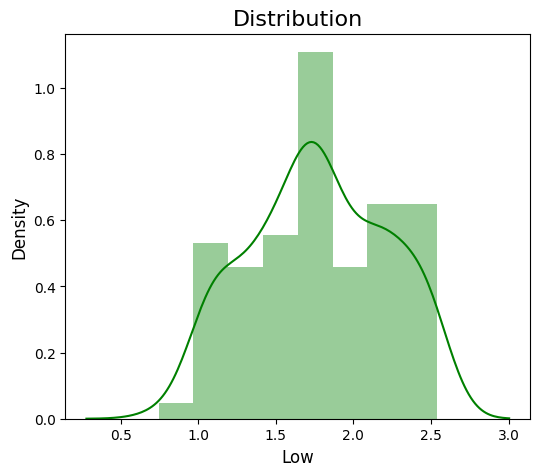

In [ ]:
# Applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df_yesbank[col]), color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--Now looks like  normally distrubuted !!!

## **Scatter Plot to see the Best Fit line**

**Best Fit Line:-**
A line of best fit is a straight line that is the best approximation of the given set of data.
It is used to study the nature of the relation between two variables.

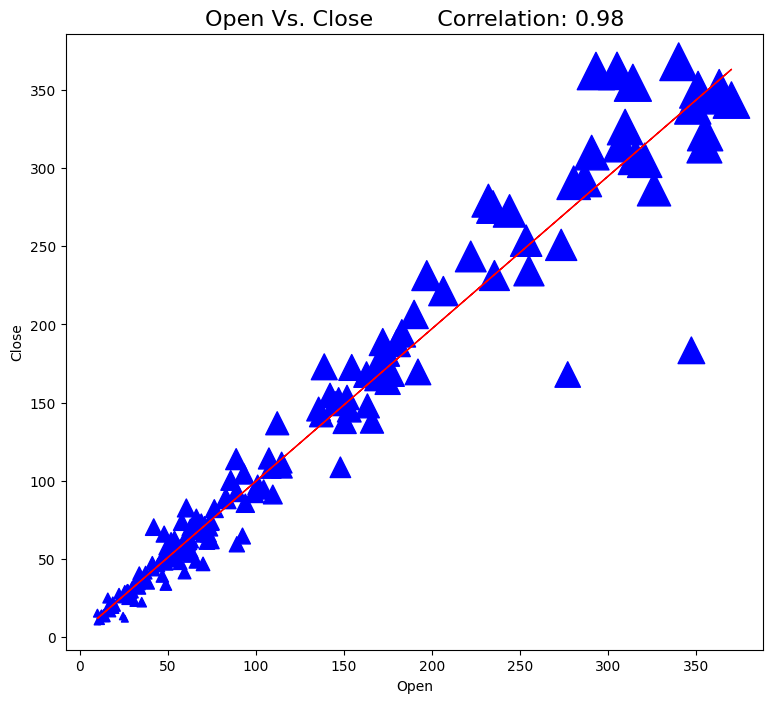

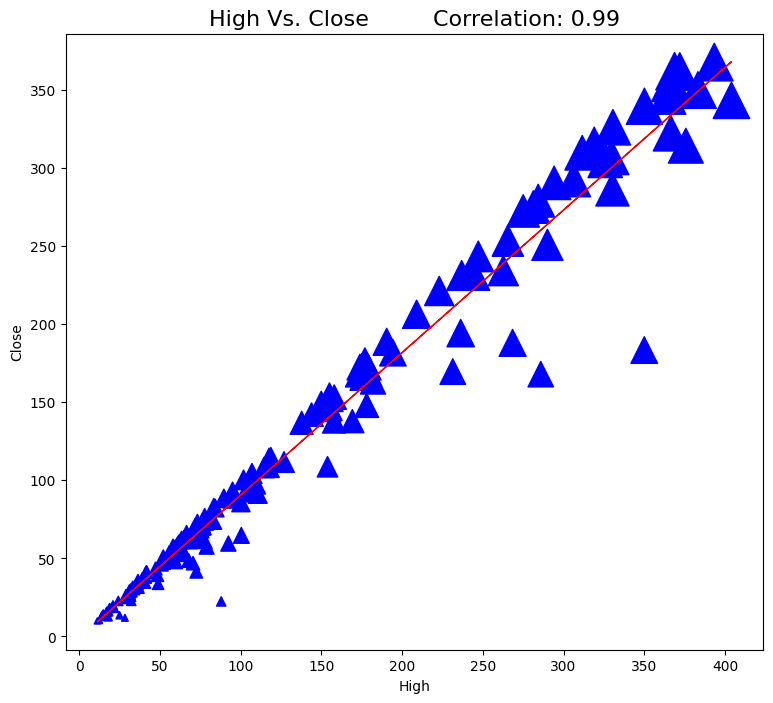

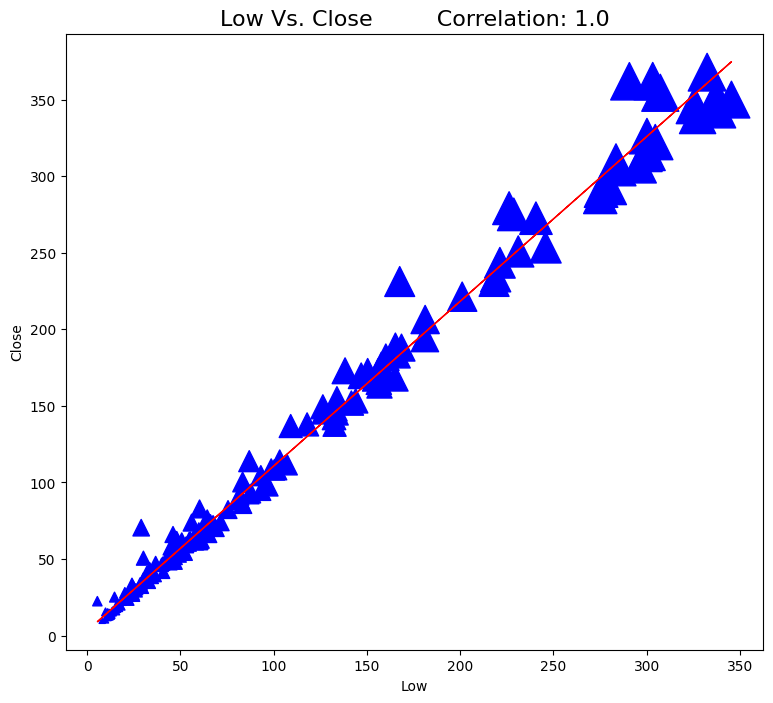

In [ ]:
# Now to plot scatter plot with best fit line.
for col in numerical_features:
   fig = plt.figure(figsize=(9, 8))
   ax = fig.gca()
   feature = df_yesbank[col]
   label = df_yesbank['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label,marker="^",c="b",s = label*2)
   plt.xlabel(col)
   plt.ylabel('Close')
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df_yesbank[col], df_yesbank['Close'], 1)
   y_hat = np.poly1d(z)(df_yesbank[col])

   plt.plot(df_yesbank[col], y_hat, "r", lw=1)

plt.show()

# **Checking Correlation between variables**

<Axes: >

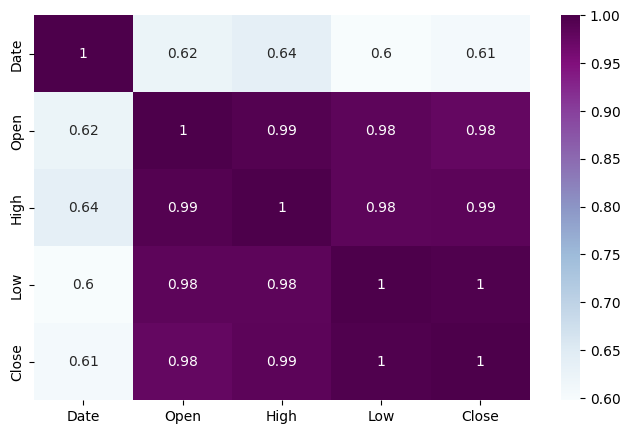

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

*  There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

*  To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

*  so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

**VIF:-**
The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable.

<Axes: >

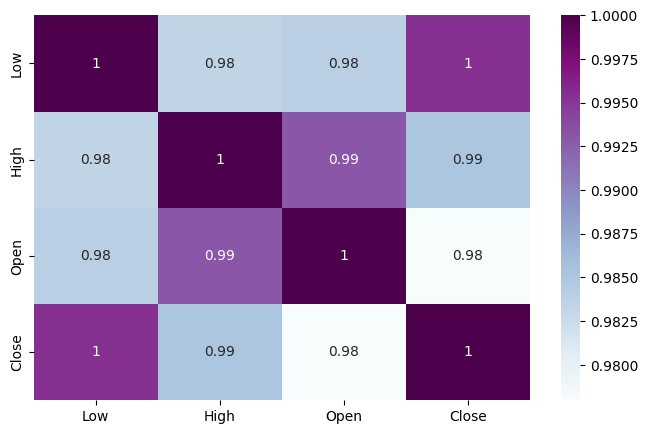

In [ ]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df_yesbank[['Low','High','Open','Close']].corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

* In general case, Any variable having VIF above 5 is considered to be multicollinear.
* The thumb rule is to drop the highest VIF variable.
* However, you may choose to select the variable to be dropped based on business logic
* Here all feature are equally important and we have very limited features.


# **Data transformation**

**Splitting data**

*  X = Independent variable
*  Y = Dependent variable



In [ ]:
X = df_yesbank.drop(columns=['Close','Date'])
y = df_yesbank['Close']

**Normalization**

## Data must be normally distributed before apply normalization..

Normalization is one of the feature scaling techniques. We particularly apply normalization when the data is skewed on the either axis i.e. when the data does not follow the gaussian distribution.In normalization, we convert the data features of different scales to a common scale which further makes it easy for the data to be processed for modeling. Thus, all the data features(variables) tend to have a similar impact on the modeling portion.

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Splitting train test data with 80-20**

In [ ]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#shape of testing dataset.
X_test.shape

(37, 3)

# **1) Linear Regression**

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [ ]:
#fit data into Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 4)

0.8147

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 4)

0.8226

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [ ]:
test_df[' Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

-Time to know about metrics

**Evaluation Metrics of Linear Regression:**



1.   Mean Squared Error (MSE):- The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.
2.   Mean Absolute Error (MAE):-
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.
3. R-squared or Coefficient of Determination:-
This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
4. Root Mean Squared Error (RMSE):-
This is the square root of the average of the squared difference of the predicted and actual value.R-squared error is better than RMSE. This is because R-squared is a relative measure while RMSE is an absolute measure of fit
5. Adjusted R-squared — selection criterion:-
The main difference between adjusted R-squared and R-square is that R-squared describes the amount of variance of the dependent variable represented by every single independent variable, while adjusted R-squared measures variation explained by only the independent variables that actually affect the dependent variable.
6. Mean Absolute Percentage Error (MAPE):-
The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages.



In [ ]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
R2 : 0.8226


**Linear Regression: Actual Vs. Predicted**

--Lets know actual and model predicted curve

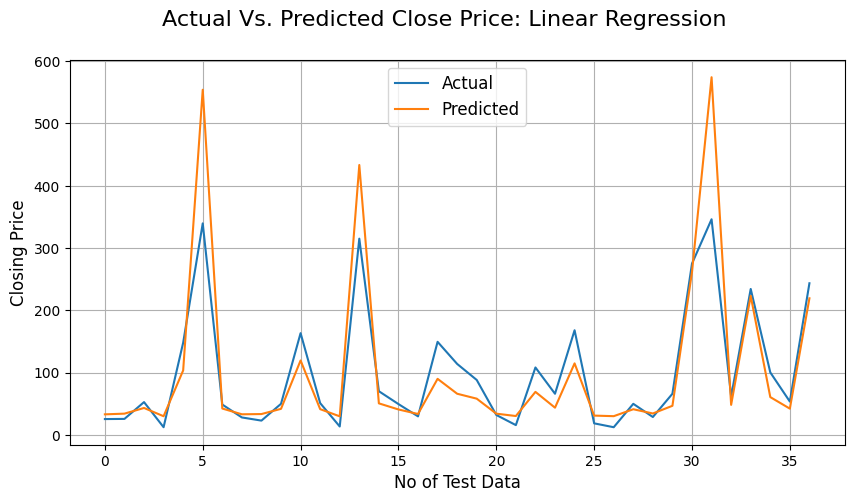

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

There is much value difference seen spikes of price

# **2) Lasso Regression**

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [ ]:
#fit data into Lasso Regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1,max_iter=3000)  #will keep alpha=0.1 and max iteration upto 3000
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),4)

0.7596

-it looks less accuracy than linear regression

In [ ]:

#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
y_pred_lasso

array([1.59885328, 1.60997773, 1.68949351, 1.56874001, 1.97344962,
       2.50656093, 1.68566448, 1.59981089, 1.60579373, 1.67686268,
       2.01562595, 1.67079926, 1.56599398, 2.42326589, 1.73700316,
       1.66886904, 1.60484921, 1.92532022, 1.82059101, 1.78055609,
       1.61048878, 1.57288435, 1.83725499, 1.68838669, 1.99972092,
       1.57880718, 1.56982374, 1.66984062, 1.61279255, 1.71366385,
       2.26101503, 2.52324602, 1.72444246, 2.22095436, 1.79381669,
       1.67767545, 2.20353159])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,39.705739
179,25.60,40.735939
66,52.59,48.920795
40,12.26,37.045888
166,147.95,94.069671


**Evaluation Metrics of Lasso Regression:**

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0436
RMSE : 0.2088
MAE : 0.1672
MAPE : 0.1099
R2 : 0.755


**Lasso Regression: Actual Vs. Predicted**

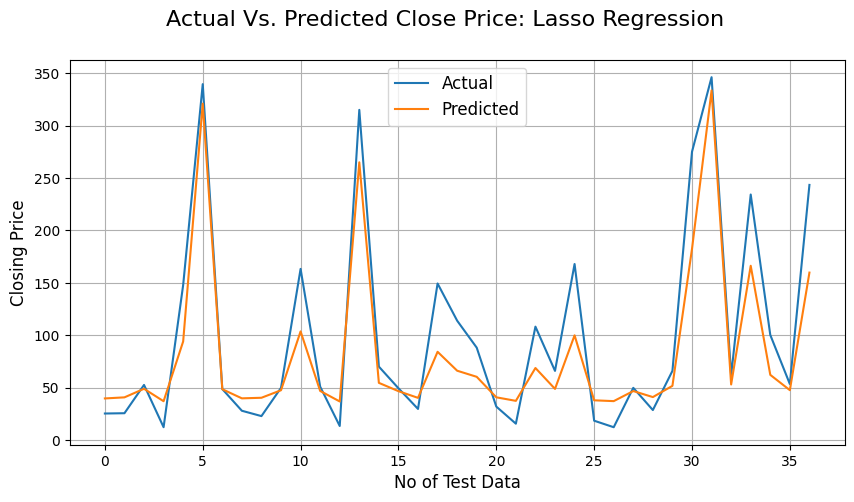

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

As we see spike get accurately predicted in lasso but flat prices predication varies much

# **Cross Validation on Lasso Regression**

# We must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :
1.   Reserve some portion of sample data-set.
2.   Using the rest data-set train the model.
3.   Test the model using the reserve portion of the data-set.#

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0352


In [ ]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [ ]:
y_pred_lasso_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso_cv
lasso_df = test_df.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


**Evaluation Metrics of Lasso Regression after Validation:**

In [ ]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


After validation accuracy increase

**Lasso Regression After Validation: Actual Vs. Predicted**

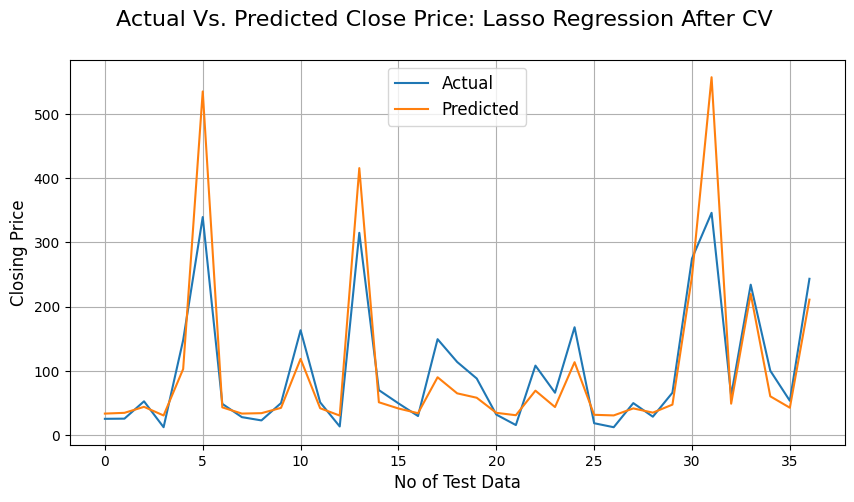

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


# **3) Ridge Regression**

Ridge regression is one of the most fundamental regularization techniques which is not used by many due to the complex science behind it. If you have an overall idea about the concept of multiple regression, it’s not so difficult to explore the science behind Ridge regression in r. Regression is the same, what makes regularization different is that the way how the model coefficients are determined.

In [ ]:
#fit data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),4)

0.8147

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,32.913409
179,25.60,34.050369
66,52.59,43.179458
40,12.26,29.881840
166,147.95,103.459390


**Ridge Regression: Actual Vs. Predicted**

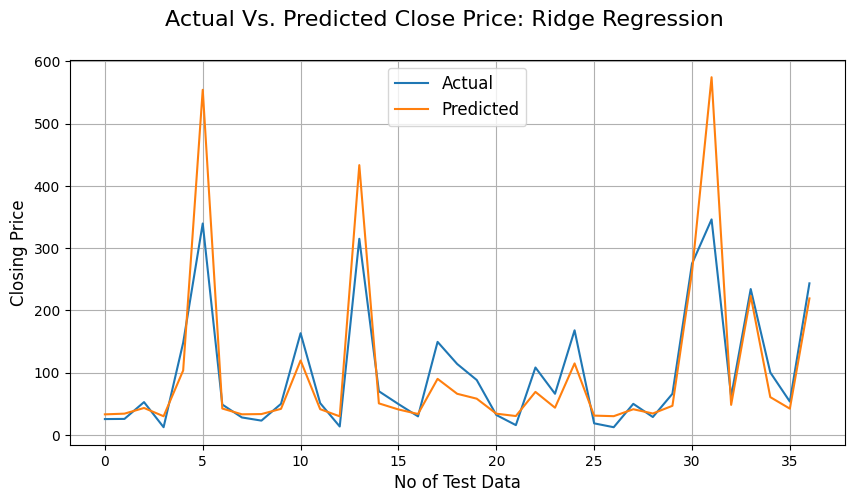

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Cross Validation on Ridge Regression**

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [ ]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

In [ ]:
y_pred_ridge_cv

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


**Evaluation Metrics of Ridge Regression after Validation:-**

In [ ]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 4))

MSE : 0.0325
RMSE : 0.1804
MAE : 0.1531
MAPE : 0.0968
R2 : 0.8172


**Ridge Regression After Validation: Actual Vs. Predicted**

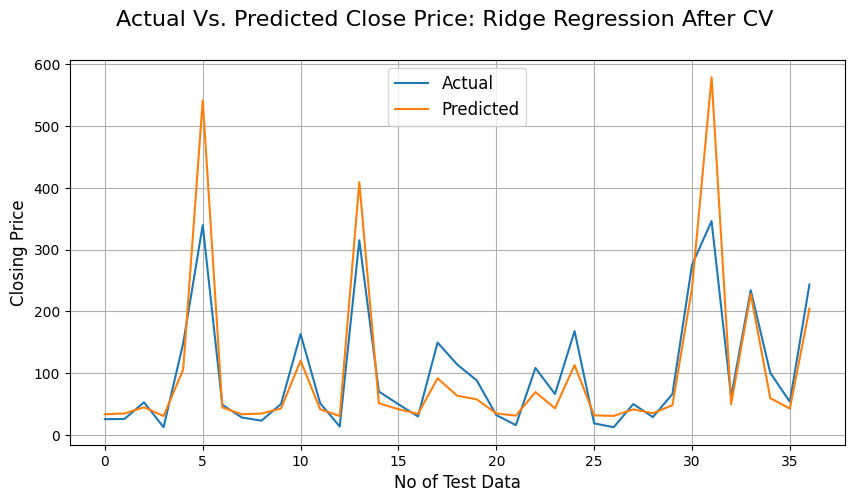

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **4) Elastic Net Regression**

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

In [ ]:
#fit data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),3)

0.796

In [ ]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [ ]:
y_pred_elastic

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [ ]:
np.array(y_pred)

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic
elasticnet_df = test_df.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elasticnet_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,36.380300
179,25.60,37.556885
66,52.59,46.989145
40,12.26,33.718035
166,147.95,99.879729


In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


**Elastic Net: Actual Vs. Predicted**

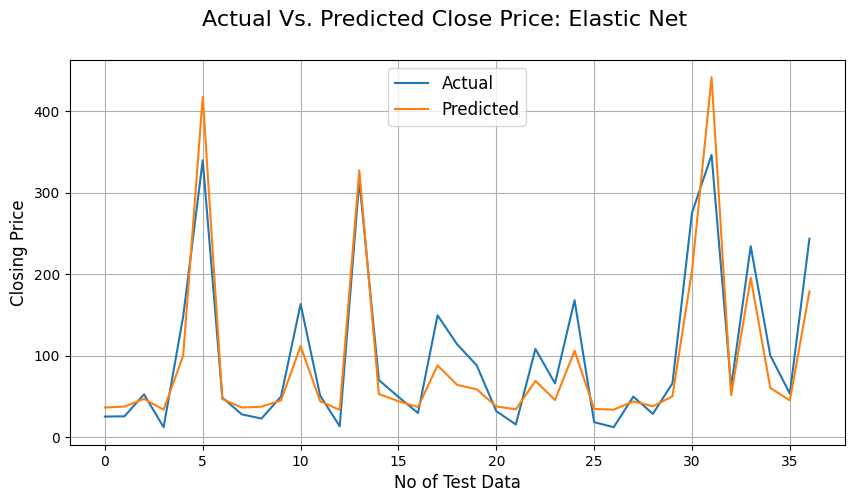

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Cross Validation on Elastic Net**

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.037


In [ ]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

In [ ]:
y_pred_elastic_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic_cv
elastic_df = test_df.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elastic_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,33.471548
179,25.60,34.648004
66,52.59,43.984987
40,12.26,30.530694
166,147.95,102.907521


**Evaluation Metrics of Elastic Net after Validation:**

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


**Elastic Net After Validation: Actual Vs. Predicted**

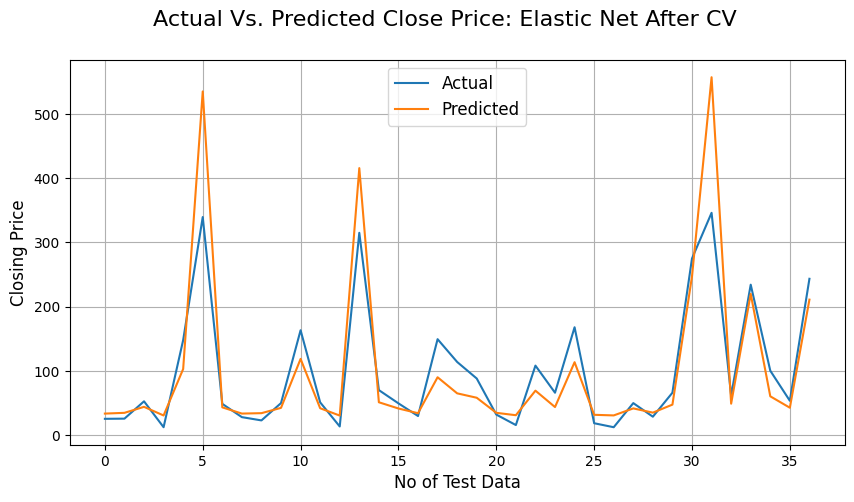

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

## **KNN Model**

K-NN stands for K-Nearest Neighbors. It is an algorithm used for the prediction of a continuous variable. A non-parametric and a prediction problem; it does not care about the relationship between the predictor x the response variable y. It takes k nearest neighbors whose distances form that point are minimum and computes the average of those values.

In [ ]:
#Let's apply the KNn regrssor model
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =3)
#fitting the model
knn_model=knn_regressor.fit(X_train,y_train)
#Prediction
y_knn_pred=knn_model.predict(X_test)

In [ ]:
#K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7,shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  76.45502645502644


In [ ]:
#Let's apply the KNn regrssor model
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =4)
#fitting the model
knn_model=knn_regressor.fit(X_train,y_train)
#Prediction
y_knn_pred=knn_model.predict(X_test)

In [ ]:
#K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7,shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  77.15773809523809


In [ ]:
#Let's apply the KNn regrssor model
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =5)
#fitting the model
knn_model=knn_regressor.fit(X_train,y_train)
#Prediction
y_knn_pred=knn_model.predict(X_test)

In [ ]:
#K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7,shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  72.14285714285714


As we can see accuracy max at 4 so we can take 4 as k

In [ ]:
#Let's apply the KNn regrssor model
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors =4)
#fitting the model
knn_model=knn_regressor.fit(X_train,y_train)
#Prediction
y_knn_pred=knn_model.predict(X_test)

That **k-fold cross validation** is a procedure used to estimate the skill of the model on new data.
There are common tactics that you can use to select the value of k for your dataset.
There are commonly used variations on cross-validation such as stratified and repeated that are available in scikit-learn.

In [ ]:
#K-Fold cross validation
knn_kfold = model_selection.KFold(n_splits=7,shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  77.15773809523809


In [ ]:
test_df['KNN Predicted Closing Price'] = 10**y_knn_pred
knn_df = test_df.loc[:,['Actual Closing Price','KNN Predicted Closing Price']]
knn_df.head(10)

,Actual Closing Price,KNN Predicted Closing Price
16,25.32,25.818837
179,25.60,28.828458
66,52.59,58.048791
40,12.26,14.445112
166,147.95,147.676793
155,339.60,334.034848
97,48.65,49.278498
177,27.95,25.818837
35,22.85,27.264837
54,49.84,53.258799


In [ ]:

print("MSE :",round(mean_squared_error(y_test, y_knn_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_knn_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_knn_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_knn_pred),4))
print("R2 :",round(r2_score(y_test, y_knn_pred), 4))

MSE : 0.0013
RMSE : 0.0365
MAE : 0.0274
MAPE : 0.0177
R2 : 0.9925


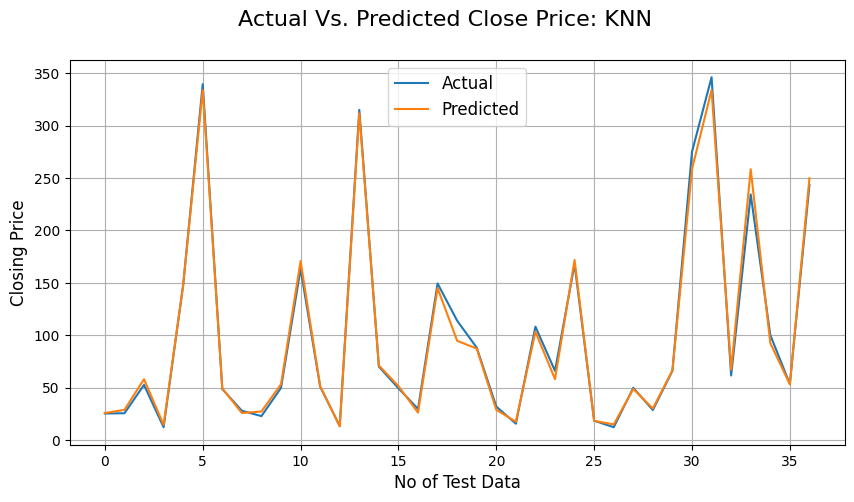

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_knn_pred))
plt.suptitle('Actual Vs. Predicted Close Price: KNN', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
#Defining the hypertuning parameters
n_estimators=[3,10]
max_depth=[5,10,15]
max_leaf_nodes=[20,15,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
rf_grid.fit(X_train, y_train)

rf_grid.best_score_ , rf_grid.best_params_


(0.9834958243595684,
 {'max_depth': 15, 'max_leaf_nodes': 20, 'n_estimators': 10})

In [ ]:
y_rf_pred=rf_grid.predict(X_test)

In [ ]:
print("MSE :",round(mean_squared_error(y_test, y_rf_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_rf_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_rf_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_rf_pred),4))
print("R2 :",round(r2_score(y_test, y_rf_pred), 4))

MSE : 0.0014
RMSE : 0.0371
MAE : 0.028
MAPE : 0.0175
R2 : 0.9923


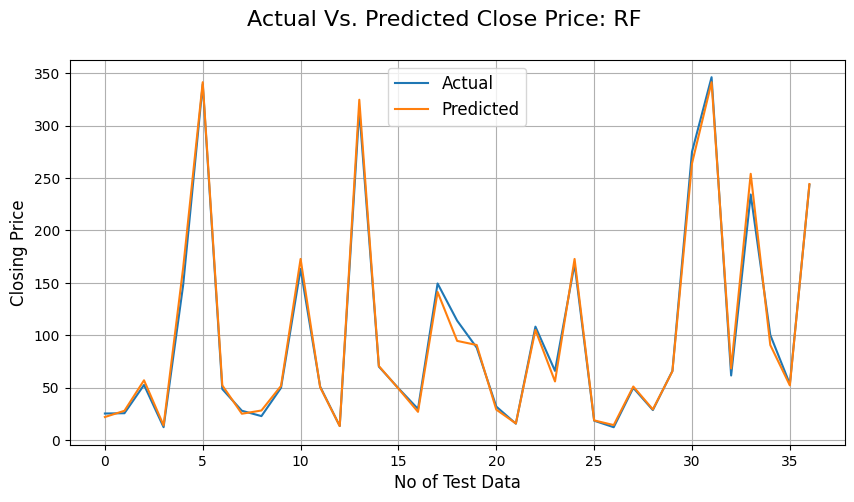

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_rf_pred))
plt.suptitle('Actual Vs. Predicted Close Price: RF', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

## **SVM**

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations.

In [ ]:
#importing SVm model
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')#Linear
#Fitting the model
svm_model=svm_regressor.fit(X_train,y_train)
#prediction
y_svm_pred=svm_model.predict(X_test)

In [ ]:
test_df['SVM Predicted Closing Price'] = 10**y_svm_pred
knn_df = test_df.loc[:,['Actual Closing Price','SVM Predicted Closing Price']]
knn_df.head(5)

,Actual Closing Price,SVM Predicted Closing Price
16,25.32,36.570768
179,25.60,37.933544
66,52.59,48.240633
40,12.26,33.490492
166,147.95,109.446796


In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_svm_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_svm_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_svm_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_svm_pred),4))
print("R2 :",round(r2_score(y_test, y_svm_pred), 4))

MSE : 0.0347
RMSE : 0.1864
MAE : 0.1489
MAPE : 0.0976
R2 : 0.8048


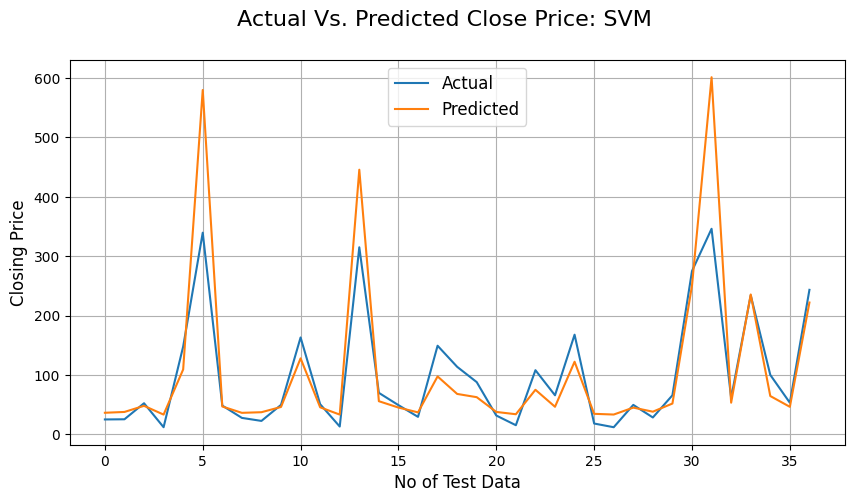

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_svm_pred))
plt.suptitle('Actual Vs. Predicted Close Price: SVM', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Evaluation Matrics Comparison:**

In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2


    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)

  return df



In [ ]:

model = [linear_reg, lasso_reg, ridge_reg, elastic,knn_regressor,svm_regressor,rf_model]

In [ ]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
6,Lasso,0.0436,0.2088,0.1672,0.1099,0.7550
5,ElasticNet,0.0364,0.1908,0.1574,0.1024,0.7955
4,SVR,0.0347,0.1864,0.1489,0.0976,0.8048
3,Ridge,0.0316,0.1777,0.1513,0.0954,0.8225
2,LinearRegression,0.0316,0.1777,0.1513,0.0954,0.8226
1,RandomForestRegressor,0.0013,0.0367,0.0265,0.0168,0.9924
0,KNeighborsRegressor,0.0013,0.0365,0.0274,0.0177,0.9925


# **Conclusion**

* In EDA part we observed that
1. There is increase in trend of Yes Bank's stock's Close,Open,High,Low price till 2018 an then sudden decrease.
2. We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.
3. We saw Linear relation between the dependent and independent values.
4. There was alot of multicollinearity present in data.

*  Target variable(dependent variable) strongly dependent on independent variables
*  We get maximum accuracy of 99%
*  Linear regression and Ridge regression get almost same R squared value
*  Whereas Lasso model shows lowest R squared value and high MSE,RMSE,MAE,MAPE
* 	Ridge regression shrunk the parameters to reduce complexity and multicollinearity but ended up affecting the evaluation metrics.
*  Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
* KNN end up giving the highest R squared value. The predicted values are nearly equal to the actual values. We got 99% accuracy.
* SVM and Elastic Net showed nearly equal accuracy.
